In [538]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [539]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [540]:
# first five rows of the dataframe
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [541]:
# first five rows of the dataframe
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [542]:
# first five rows of the dataframe
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [543]:
# first five rows of the dataframe
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


### Summary of Each Ride
***The function for the summary of each ride***

In [544]:
def summary(dataframe):
    print("Total number of records in the ride:", len(dataframe))
    print("Total time used for the ride (in second):", dataframe['timedelta'].sum())
    print("The overall distance of the ride (in km):", dataframe['distance'].sum())
    print("The average distance of the ride (in km):", dataframe['distance'].mean())
    print("The longest distance of the ride (in km):", dataframe['distance'].max())
    print("The shortest distance of the ride (in km):", (dataframe['distance'].loc[dataframe['distance'] != 0.0]).min()) # shortest but is not equal to 0
    print("The average speed of the ride (in km/h):", dataframe['speed'].mean())
    print("The fastest speed of the ride (in km/h):", dataframe['speed'].max())
    print("The slowest speed of the ride (in km/h):", (dataframe['speed'].loc[dataframe['speed'] != 0.0]).min()) # slowest but is not equal to 0
    print("The average heart rate (in beats per minute):", dataframe['hr'].mean())
    print("The highest heart rate (in beats per minute):", dataframe['hr'].max())
    print("The lowest heart rate (in beats per minute):", dataframe['hr'].min())

* *First ride: the 2016 road race*

In [545]:
summary(rr_2016)

Total number of records in the ride: 2822
Total time used for the ride (in second): 5200.0
The overall distance of the ride (in km): 49.04858574628638
The average distance of the ride (in km): 0.017380788712362302
The longest distance of the ride (in km): 0.07628260675759571
The shortest distance of the ride (in km): 0.003271394458699917
The average speed of the ride (in km/h): 34.93308475482947
The fastest speed of the ride (in km/h): 92.74903649913952
The slowest speed of the ride (in km/h): 8.62340892533519
The average heart rate (in beats per minute): 158.39440113394755
The highest heart rate (in beats per minute): 205.0
The lowest heart rate (in beats per minute): 102.0


* *Second ride: the 2016 time trial*


In [546]:
summary(tt_2016)

Total number of records in the ride: 1541
Total time used for the ride (in second): 2747.0
The overall distance of the ride (in km): 24.80288703130808
The average distance of the ride (in km): 0.016095319293515962
The longest distance of the ride (in km): 0.28817489548339187
The shortest distance of the ride (in km): 0.0015950196011899993
The average speed of the ride (in km/h): 33.52996304869014
The fastest speed of the ride (in km/h): 162.50576377606754
The slowest speed of the ride (in km/h): 0.2496552572030572
The average heart rate (in beats per minute): 170.93964957819597
The highest heart rate (in beats per minute): 251.0
The lowest heart rate (in beats per minute): 100.0


* *Third ride: the 2019 road race*

In [547]:
summary(rr_2019)

Total number of records in the ride: 5503
Total time used for the ride (in second): 5502.0
The overall distance of the ride (in km): 51.7891325359606
The average distance of the ride (in km): 0.009411072603300125
The longest distance of the ride (in km): 0.01954735241204344
The shortest distance of the ride (in km): 0.0018716501203288423
The average speed of the ride (in km/h): 33.87986137188044
The fastest speed of the ride (in km/h): 70.37046868335639
The slowest speed of the ride (in km/h): 6.737940433183832
The average heart rate (in beats per minute): 138.99854624750137
The highest heart rate (in beats per minute): 170.0
The lowest heart rate (in beats per minute): 71.0


* *Fourth ride: the 2019 time trial*

In [548]:
summary(tt_2019)

Total number of records in the ride: 2655
Total time used for the ride (in second): 2654.0
The overall distance of the ride (in km): 24.38014504376575
The average distance of the ride (in km): 0.009182728830043601
The longest distance of the ride (in km): 0.017583537256095835
The shortest distance of the ride (in km): 0.0019087728602351173
The average speed of the ride (in km/h): 33.05782378815691
The fastest speed of the ride (in km/h): 63.300734121945005
The slowest speed of the ride (in km/h): 6.871582296846422
The average heart rate (in beats per minute): 152.74124293785312
The highest heart rate (in beats per minute): 166.0
The lowest heart rate (in beats per minute): 88.0


**Comment:** From the summary above, we can notice that there are several records which may be considered as outliers. For example, the minimum speed of the 2016 time trial dataset was only 0.2497 km in an hour and the maximum speed was 162.5058 km in an hour, while the average speed is around 33.53 km in an hour. The same situation could be seen in heart rate of the same dataset, which the maximum heart rate is up to 251.0 beats per minute; this record is extremely higher than the [target heart rate zone of adults when exercising](https://my.clevelandclinic.org/health/diagnostics/17402-pulse--heart-rate) (maximum heart rate in all ages is just 170 beats per minute normally). Therefore, the heart rate which is up to 251.0 beats per minute is not a reasonably normal heart rate even when an individual is exercising hard. As a result, these records might be considered as outliers (not only just in the 2016 time trial dataset).

### Data Manipulation

***Missing value***

We check if there is any missing value in each dataset in any field.

In [549]:
# missing value in the 2016 road race 
rr_2016.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [550]:
# missing value in the 2016 time trial
tt_2016.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [551]:
# missing value in the 2019 road race 
rr_2019.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [552]:
# missing value in the 2019 road race 
tt_2019.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

**Comment:** The only NaN value in each dataset is the time delta. From observation we could see that the NaN time delta appears at the first record of each dataset, where there is no previous record for calculating the time difference between two observations.

Also, there is no record (0) in the speed and distance (the two main feature when exploring cycling dataset), which means there might be slight change in these fields at the beginning of each ride. Therefore, these records could be removed as they do not contribute to the analysis, as they may not change significantly on either the speed or the distance when riding.

In [553]:
# remove the first record of each dataset
cleaned_rr_2016 = rr_2016[1:]
cleaned_tt_2016 = tt_2016[1:]
cleaned_rr_2019 = rr_2019[1:]
cleaned_tt_2019 = tt_2019[1:]

***Plotting and dealling with any outlier in each dataset***

* **Distance**

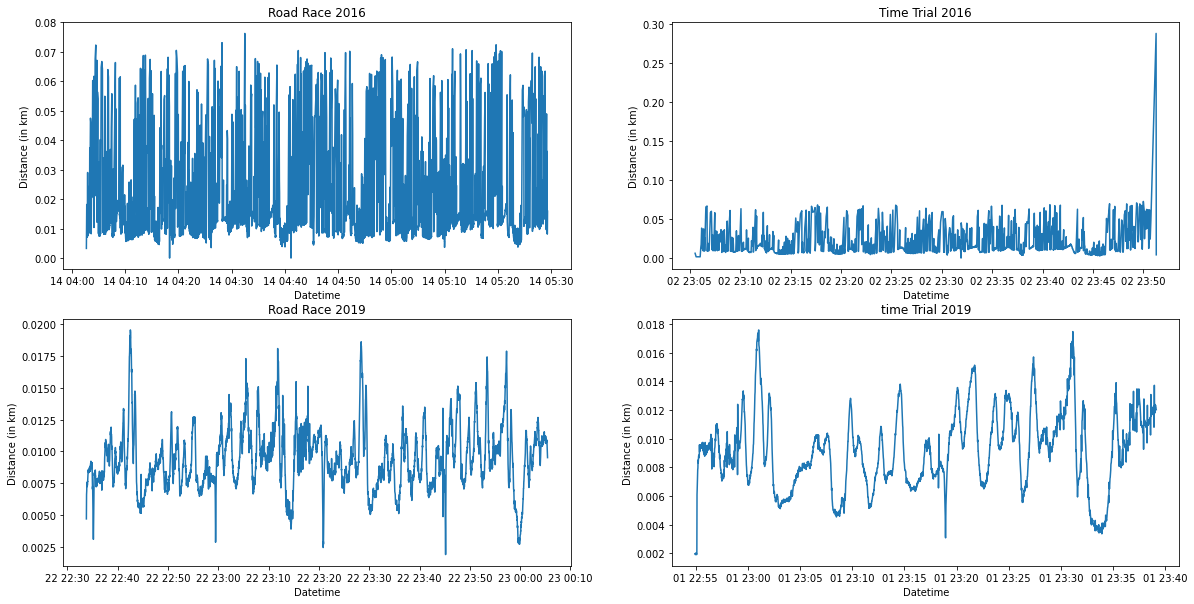

In [554]:
plt.figure(figsize=(20,10))

# cleaned_rr_2016
plt.subplot(2,2,1)
plt.title("Road Race 2016")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(cleaned_rr_2016['distance'])

# cleaned_tt_2016
plt.subplot(2,2,2)
plt.title("Time Trial 2016")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(cleaned_tt_2016['distance'])

# cleaned_rr_2019
plt.subplot(2,2,3)
plt.title("Road Race 2019")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(cleaned_rr_2019['distance'])

# cleaned_tt_2019
plt.subplot(2,2,4)
plt.title("time Trial 2019")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(cleaned_tt_2019['distance'])

**Interpretation:** the 'distance' of the 2016 road race,the 2019 road race and the 2019 time trial datasets seem not to have any outlier (except 0) as the plot shows that all the records distribute quite balanced around the mean value. However, the time trial 2016 might have outlier at the end of the plot where the distance is up to nearly 0.30 km, while the mean value is around 0.02 km.

**Dealing with outliers**

Firstly, we will work at the dataset tt_2016 (i.e. the 2016 time trial).

As the mean value of distance in this dataset is around 0.02 km, we assume the maximum value of the distance should not be over 0.1km (i.e. we are only interest the distance records from 0.0016 (the minimum distance except 0) to 0.1 km). We choose 0.1km as maximum because almost all the records of distance surround the mean value vary within this range, and they distribute quite balanced.

In [555]:
# count the number of records which is over 0.1km
print("The number of distance outliers of cleaned_tt_2016:",cleaned_tt_2016['distance'][cleaned_tt_2016.distance > 0.1].value_counts().sum())

The number of distance outliers of cleaned_tt_2016: 1


In [556]:
# print out the record of outlier
outlier = cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['distance']<=0.1])
outlier

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [557]:
# check if the mean of the 'distance' of tt_2016 is significant different when removing outlier
cleaned_mean = cleaned_tt_2016['distance'].drop(cleaned_tt_2016.index[cleaned_tt_2016['distance']>0.1]).mean()
print("the original mean value before removing outlier", cleaned_tt_2016['distance'].mean())
print("the mean value after removing outlier", cleaned_mean)

the original mean value before removing outlier 0.016105770799550712
the mean value after removing outlier 0.01592898774257616


In [558]:
# remove the outlier, update the 2016 time trial dataset
cleaned_tt_2016 = cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['distance']>0.1])

**Comment:** It is reasonable that the distance is normal since the time delta (time period between the two observations) is up to 31 seconds. However, the average value of the distance will not be affected significantly even if we remove this outlier. Also, there is only one over 1541 records which is over 0.1km, and we are interested in almost all the records which are surround the mean and within the range from 0.0016 to 0.1km. Therefore, we would consider the record of 0.288175km as an outlier and remove it instead of changing the value to the mean value (as we cannot ensure that whether the mean value is fit for the speed or even the largest timedelta in this dataset, it is better to be removed without affect too much on average).

Secondly, we remove the records of four datasets which contain 0 in the 'distance', since they do not contribute significantly to the average mean of the distance. Also, the analysis mostly focuses on the change between observation in various field (speed, distance, etc.). The value 0 means there is no change in the distance on a specific observation. Thus, we are not interested in a record which has 0km in distance (either when the cyclist has a break during the ride or the GPS works incorrectly at some points), and remove the outliers since they have not effect on the dataset (overall result).

In [559]:
# count the number of records which have 0km in distance

# rr_2016
print("The number of 0km distance of cleaned_rr_2016:", cleaned_rr_2016['distance'][cleaned_rr_2016.distance == 0.0].value_counts().sum())

# tt_2016
print("The number of 0km distance of cleaned_tt_2016:", cleaned_tt_2016['distance'][cleaned_tt_2016.distance == 0.0].value_counts().sum())

# rr_2019
print("The number of 0km distance of cleaned_rr_2019:", cleaned_rr_2019['distance'][cleaned_rr_2019.distance == 0.0].value_counts().sum())

# tt_2019
print("The number of 0km distance of cleaned_tt_2019:", cleaned_tt_2019['distance'][tt_2019.distance == 0.0].value_counts().sum())

The number of 0km distance of cleaned_rr_2016: 2
The number of 0km distance of cleaned_tt_2016: 1
The number of 0km distance of cleaned_rr_2019: 0
The number of 0km distance of cleaned_tt_2019: 0


**Comment:** there are only 2/2821 and 1/1539 (exclude the records which have been removed before) records which has 0 km in distance in the 2016 road race and the 2016 time trial respectively; there is no 0 km record in distance for the last two datasets. Thus, it is reasonable to remove these records.

In [560]:
# update the cleaned dataset
cleaned_rr_2016 = cleaned_rr_2016.drop(cleaned_rr_2016.index[cleaned_rr_2016['distance']==0.0])
cleaned_tt_2016 = cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['distance']==0.0])

In [561]:
# check the number of records so far for each datashape
print("the 2016 road race records:", len(cleaned_rr_2016))
print("the 2016 time trial records:", len(cleaned_tt_2016))
print("the 2019 road race records:", len(cleaned_rr_2019))
print("the 2019 time trial records:", len(cleaned_tt_2019))

the 2016 road race records: 2819
the 2016 time trial records: 1538
the 2019 road race records: 5502
the 2019 time trial records: 2654


* **Speed**

We repeated the same steps as working with distance above.

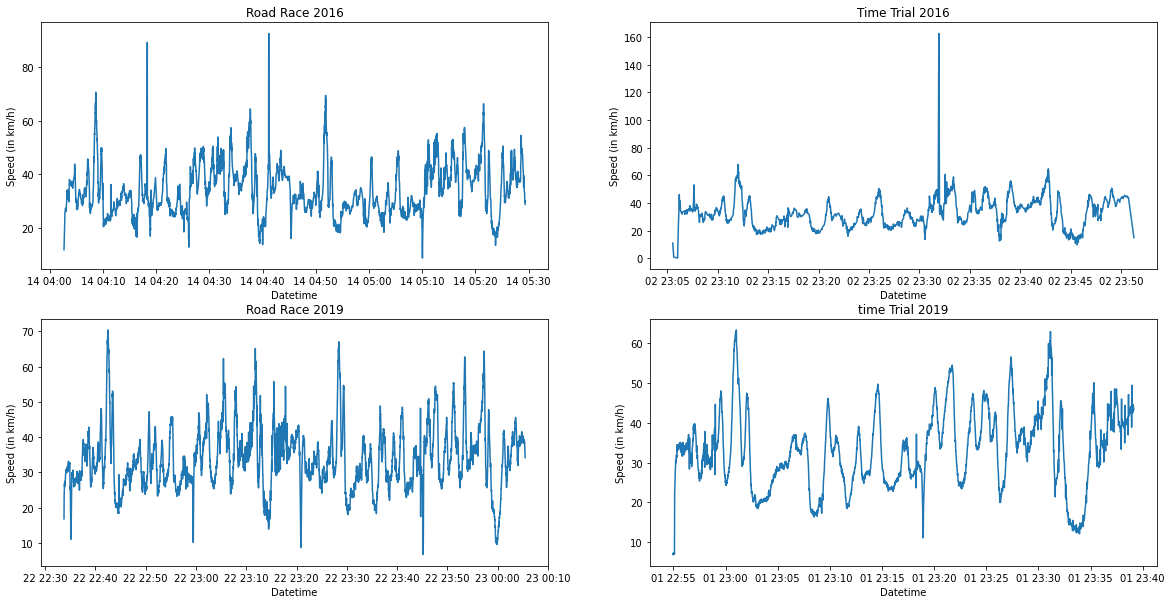

In [562]:
plt.figure(figsize=(20,10))

# cleaned_rr_2016
plt.subplot(2,2,1)
plt.title("Road Race 2016")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_rr_2016['speed'])

# cleaned_tt_2016
plt.subplot(2,2,2)
plt.title("Time Trial 2016")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_tt_2016['speed'])

# cleaned_rr_2019
plt.subplot(2,2,3)
plt.title("Road Race 2019")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_rr_2019['speed'])

# cleaned_tt_2019
plt.subplot(2,2,4)
plt.title("time Trial 2019")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_tt_2019['speed'])

**Interpretation:** It is not obvious to identify outlier in the last two dataset (the 2019 road race and the 2019 time trial), as almost all the values spread around the mean value without any noticeably distinct value. By contrast, it is noticeable that there is over one record which has the speed values roughly 90 km/h (over 85 km/h), while the mean value is around 34.9 km/h in the 2016 road race. The similar feature could be seen in the 2016 time trial, which there is a record which has the speed over 90 km/h (hits over 160 km/h) while other values surrounding the mean value (33.5) are within the range from 0 to roughly 60 km/h. Moreover, it is occasionally that the speed for a bicycle ridden could exceed 90 km/h in reality even if the cylist is on the descend, and might be impossible to reach the speed which is over 160 km/h). Therefore, these records would probably be considered as outliers.

**Dealing with outliers**

Firstly, we clean up the records which we consider as outliers in the 2016 road race and the 2016 time trial datasets.

In [563]:
# count the number of records which is considered as outliers

# the 2016 road race (assume an outlier is over 85km/h as mentioned above)
print("The number of speed outliers of cleaned_rr_2016:",cleaned_rr_2016['speed'][cleaned_rr_2016.speed > 85].value_counts().sum())

# the 2016 time trial (assume an outlier is over 80km/h as mentioned above)
print("The number of speed outliers of cleaned_tt_2016:",cleaned_tt_2016['speed'][cleaned_tt_2016.speed > 90].value_counts().sum())

The number of speed outliers of cleaned_rr_2016: 2
The number of speed outliers of cleaned_tt_2016: 1


In [564]:
# show the records which are considered as outliers
cleaned_rr_2016.drop(cleaned_rr_2016.index[cleaned_rr_2016['speed']<85])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:18:21+00:00,-33.350280,151.229901,248.4,27.0,0.0,82.0,150.0,0.024832,0.4,89.394487,1.0
2016-05-14 04:41:10+00:00,-33.396044,151.215447,217.8,25.0,0.0,109.0,171.0,0.025764,-0.6,92.749036,1.0


In [565]:
cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['speed']<90])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:31:56+00:00,-33.323997,151.232286,186.8,10.0,0.0,85.0,178.0,0.04514,0.0,162.505764,1.0


**Comment:** There are only 2/2819 and 1/1539 records which are considered as outliers in the 2016 road race and the 2016 time trial respectively. Also, in the 2016 road race, these records are considered on a flat riding where the 'evelation_gain' are 0.4 and -0.6 (m). Similarly, in the 2016 time trial, the speed reach 162.5 km/h even the ride is on the flat condition (where the elevation_gain is 0). Therefore, it is probably impossible that the cyclist could reach these speed values. Thus, the outliers should be removed.

In [566]:
# remove outliers
cleaned_rr_2016 = cleaned_rr_2016.drop(cleaned_rr_2016.index[cleaned_rr_2016['speed']>85])
cleaned_tt_2016 = cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['speed']>90])

Secondly, we consider those records which have the speed of 0 km/h as outliers,since they do not contribute significantly to the average mean of the speed Thus, we are not interested in a record which has 0km in speed (either when the cyclist has a break during the ride or the GPS works incorrectly at some points), and remove the outliers since they have not effect on the dataset (no change on a specific record).

In [567]:
# count the number of records which have 0km in distance

# rr_2016
print("The number of 0km speed of cleaned_rr_2016:", cleaned_rr_2016['speed'][cleaned_rr_2016.speed == 0.0].value_counts().sum())

# tt_2016
print("The number of 0km speed of cleaned_tt_2016:", cleaned_tt_2016['speed'][cleaned_tt_2016.speed == 0.0].value_counts().sum())

# rr_2019
print("The number of 0km speed of cleaned_rr_2019:", cleaned_rr_2019['speed'][cleaned_rr_2019.speed == 0.0].value_counts().sum())

# tt_2019
print("The number of 0km speed of cleaned_tt_2019:", cleaned_tt_2019['speed'][tt_2019.speed == 0.0].value_counts().sum())

The number of 0km speed of cleaned_rr_2016: 0
The number of 0km speed of cleaned_tt_2016: 0
The number of 0km speed of cleaned_rr_2019: 0
The number of 0km speed of cleaned_tt_2019: 0


**Comment:** There is no any 0 km/h speed in all the datasets.

In [568]:
# check the number of records so far for each datashape
print("the 2016 road race records:", len(cleaned_rr_2016))
print("the 2016 time trial records:", len(cleaned_tt_2016))
print("the 2019 road race records:", len(cleaned_rr_2019))
print("the 2019 time trial records:", len(cleaned_tt_2019))

the 2016 road race records: 2817
the 2016 time trial records: 1537
the 2019 road race records: 5502
the 2019 time trial records: 2654


* **Heart rate**

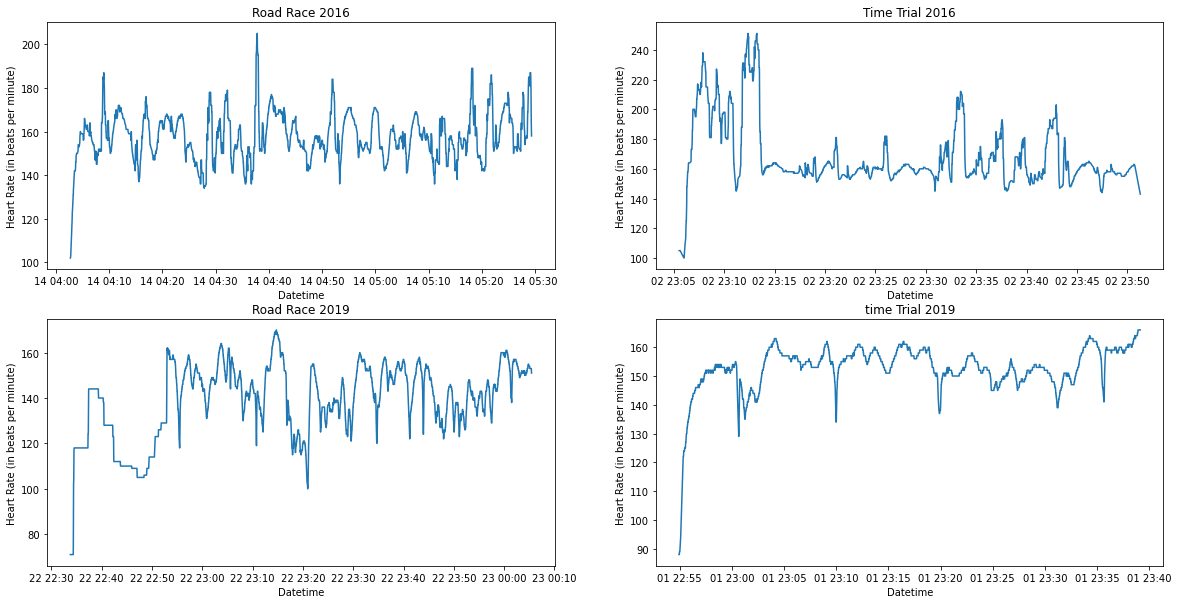

In [569]:
plt.figure(figsize=(20,10))

# cleaned_rr_2016
plt.subplot(2,2,1)
plt.title("Road Race 2016")
plt.xlabel("Datetime")
plt.ylabel("Heart Rate (in beats per minute)")
plt.plot(cleaned_rr_2016['hr'])

# cleaned_tt_2016
plt.subplot(2,2,2)
plt.title("Time Trial 2016")
plt.xlabel("Datetime")
plt.ylabel("Heart Rate (in beats per minute)")
plt.plot(cleaned_tt_2016['hr'])

# cleaned_rr_2019
plt.subplot(2,2,3)
plt.title("Road Race 2019")
plt.xlabel("Datetime")
plt.ylabel("Heart Rate (in beats per minute)")
plt.plot(cleaned_rr_2019['hr'])

# cleaned_tt_2019
plt.subplot(2,2,4)
plt.title("time Trial 2019")
plt.xlabel("Datetime")
plt.ylabel("Heart Rate (in beats per minute)")
plt.plot(cleaned_tt_2019['hr'])

**Interpretation:** There are several heart rates which are over [the estimated maximum heart rate](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm), which is the subtraction of age from 220. Therefore, these heart rates might be onsidered as occasional situations, since the estimated heart rate cannot be over 220 while the maximum heart rate of the 2016 time trial dataset is up to 251.0 beats per minute. The 2016 toad race has only some heart rates at a certain time period that are over 200 beats per minute. The mean value of the heart rate in this dataset is around 158 beats per minute. Thus, these records might be considered as outliers probably due to an inaccurate measure at that time. Because there are many records which are over 200 beats per minute (over the estimated maximum heart rate for normal adults) in the 2016 time trial, these records should also be cosidered as outliers. However, to not affect significantly on the overall and the average results, we might only choose those records which is incredibly high such as over 245 beats per minute as outliers.

**Dealing with outliers**

In [570]:
# count the records we think they are outliers

# rr_2016 (over 200 beats per minute and under 120 beats per minute)
print("The number of heart rate outliers of cleaned_rr_2016:",cleaned_rr_2016['hr'][cleaned_rr_2016.hr >= 200].value_counts().sum())

# tt_2016 (over 240 beats per minute)
print("The number of heart rate outliers of cleaned_tt_2016:",cleaned_tt_2016['hr'][cleaned_tt_2016.hr >= 245].value_counts().sum())

The number of heart rate outliers of cleaned_rr_2016: 9
The number of heart rate outliers of cleaned_tt_2016: 14


In [571]:
# show the records whihc are considered as outliers
cleaned_rr_2016.drop(cleaned_rr_2016.index[cleaned_rr_2016['hr'] < 200])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:37:41+00:00,-33.385023,151.224204,190.4,25.0,0.0,0.0,200.0,0.017395,-1.2,62.622154,1.0
2016-05-14 04:37:42+00:00,-33.385181,151.224198,189.2,25.0,0.0,0.0,200.0,0.017578,-1.2,63.279462,1.0
2016-05-14 04:37:43+00:00,-33.385342,151.224204,187.8,25.0,0.0,0.0,200.0,0.017911,-1.4,64.479775,1.0
2016-05-14 04:37:44+00:00,-33.385494,151.224217,186.8,25.0,0.0,0.0,200.0,0.016945,-1.0,61.000820,1.0
2016-05-14 04:37:45+00:00,-33.385645,151.224238,185.8,25.0,0.0,0.0,200.0,0.016903,-1.0,60.851745,1.0
2016-05-14 04:37:46+00:00,-33.385791,151.224264,184.8,25.0,0.0,0.0,205.0,0.016413,-1.0,59.086634,1.0
2016-05-14 04:37:47+00:00,-33.385939,151.224291,183.8,25.0,0.0,0.0,205.0,0.016647,-1.0,59.928067,1.0
2016-05-14 04:37:48+00:00,-33.386082,151.224322,182.8,25.0,0.0,0.0,205.0,0.016159,-1.0,58.173366,1.0
2016-05-14 04:37:49+00:00,-33.386223,151.224351,181.8,25.0,0.0,0.0,204.0,0.015908,-1.0,57.268811,1.0


In [572]:
cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['hr'] < 245])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:12:18+00:00,-33.390721,151.223193,89.6,11.0,0.0,114.0,247.0,0.058672,0.0,52.805247,4.0
2016-07-02 23:12:20+00:00,-33.390552,151.223414,89.6,11.0,0.0,111.0,248.0,0.027823,0.0,50.081369,2.0
2016-07-02 23:12:22+00:00,-33.390358,151.223623,89.6,11.0,0.0,106.0,251.0,0.029015,0.0,52.226368,2.0
2016-07-02 23:12:24+00:00,-33.390183,151.223804,89.6,11.0,0.0,100.0,247.0,0.025711,0.0,46.279269,2.0
2016-07-02 23:12:25+00:00,-33.390107,151.223890,89.6,11.0,0.0,96.0,249.0,0.011626,0.0,41.853966,1.0
2016-07-02 23:13:05+00:00,-33.386838,151.224344,89.6,11.0,0.0,28.0,246.0,0.012057,-0.8,43.403595,1.0
2016-07-02 23:13:06+00:00,-33.386728,151.224323,88.8,11.0,0.0,112.0,246.0,0.012386,-0.8,44.589117,1.0
2016-07-02 23:13:07+00:00,-33.386624,151.224299,88.0,11.0,0.0,113.0,246.0,0.011777,-0.8,42.397186,1.0
2016-07-02 23:13:08+00:00,-33.386514,151.224277,87.4,11.0,0.0,114.0,246.0,0.012401,-0.6,44.642956,1.0
2016-07-02 23:13:09+00:00,-33.386407,151.224255,86.8,11.0,0.0,115.0,246.0,0.012072,-0.6,43.458905,1.0


**Comment:** There are 9/2817 and 14/1357 outliers in the 2016 road race and the 2016 time trial datasets respectively. Since we need less significant effect on our overall results, especially on the 'speed' of each dataset that we must use to explore the later question, we will not delete these outliers. On the other hand, we will replace them with the values before these records, which will not impact too much on the results of the datasets.

In [590]:
# record before the time period which the outliers lie on in rr_2016
cleaned_rr_2016['hr'][cleaned_rr_2016.index == "2016-05-14 04:37:40+00:00"]

2016-05-14 04:37:40+00:00    196.0
Name: hr, dtype: float64

In [605]:
# replace outliers in rr_2016 with the record has been found
outlier = cleaned_rr_2016.hr >= 200
cleaned_rr_2016['hr'][outlier] = 196.0

cleaned_rr_2016.drop(cleaned_rr_2016.index[cleaned_rr_2016['hr'] != 196.0])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:37:37+00:00,-33.384430,151.224334,195.2,25.0,0.0,0.0,196.0,0.016885,-1.0,60.785392,1.0
2016-05-14 04:37:38+00:00,-33.384572,151.224284,194.0,25.0,0.0,0.0,196.0,0.016458,-1.2,59.248780,1.0
2016-05-14 04:37:39+00:00,-33.384721,151.224249,192.8,25.0,0.0,0.0,196.0,0.016884,-1.2,60.781427,1.0
2016-05-14 04:37:40+00:00,-33.384867,151.224218,191.6,25.0,0.0,0.0,196.0,0.016488,-1.2,59.355479,1.0
2016-05-14 04:37:41+00:00,-33.385023,151.224204,190.4,25.0,0.0,0.0,196.0,0.017395,-1.2,62.622154,1.0
2016-05-14 04:37:42+00:00,-33.385181,151.224198,189.2,25.0,0.0,0.0,196.0,0.017578,-1.2,63.279462,1.0
2016-05-14 04:37:43+00:00,-33.385342,151.224204,187.8,25.0,0.0,0.0,196.0,0.017911,-1.4,64.479775,1.0
2016-05-14 04:37:44+00:00,-33.385494,151.224217,186.8,25.0,0.0,0.0,196.0,0.016945,-1.0,61.000820,1.0
2016-05-14 04:37:45+00:00,-33.385645,151.224238,185.8,25.0,0.0,0.0,196.0,0.016903,-1.0,60.851745,1.0
2016-05-14 04:37:46+00:00,-33.385791,151.224264,184.8,25.0,0.0,0.0,196.0,0.016413,-1.0,59.086634,1.0


In [622]:
# record before the time period which the outliers lie on in tt_2016 
# (there are two distinct time periods which the outliers lie on)
first_previous = cleaned_tt_2016['hr'][cleaned_tt_2016.index == "2016-07-02 23:12:14+00:00"]
print("The previous record of the first time period which the outliers lie on:", first_previous)

second_previous = cleaned_tt_2016['hr'][cleaned_tt_2016.index == "2016-07-02 23:13:04+00:00"]
print("The previous record of the second time period which the outliers lie on:", second_previous)

The previous record of the first time period which the outliers lie on: 2016-07-02 23:12:14+00:00    241.0
Name: hr, dtype: float64
The previous record of the second time period which the outliers lie on: 2016-07-02 23:13:04+00:00    244.0
Name: hr, dtype: float64


**Comment:** There are two different values which might be used to replace the outliers. Therefore, we will take the average of this two values and round up as the value to replace.

In [626]:
replacement = round((241.0+244.0)/2)
replacement

242

In [630]:
# replace outliers in tt_2016 with the replacement
outlier = cleaned_tt_2016.hr >= 245
cleaned_tt_2016['hr'][outlier] = replacement

cleaned_tt_2016.drop(cleaned_tt_2016.index[cleaned_tt_2016['hr'] != replacement])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:12:18+00:00,-33.390721,151.223193,89.6,11.0,0.0,114.0,242.0,0.058672,0.0,52.805247,4.0
2016-07-02 23:12:20+00:00,-33.390552,151.223414,89.6,11.0,0.0,111.0,242.0,0.027823,0.0,50.081369,2.0
2016-07-02 23:12:22+00:00,-33.390358,151.223623,89.6,11.0,0.0,106.0,242.0,0.029015,0.0,52.226368,2.0
2016-07-02 23:12:24+00:00,-33.390183,151.223804,89.6,11.0,0.0,100.0,242.0,0.025711,0.0,46.279269,2.0
2016-07-02 23:12:25+00:00,-33.390107,151.223890,89.6,11.0,0.0,96.0,242.0,0.011626,0.0,41.853966,1.0
2016-07-02 23:13:00+00:00,-33.387353,151.224442,93.4,11.0,0.0,0.0,242.0,0.011244,-0.8,40.479758,1.0
2016-07-02 23:13:05+00:00,-33.386838,151.224344,89.6,11.0,0.0,28.0,242.0,0.012057,-0.8,43.403595,1.0
2016-07-02 23:13:06+00:00,-33.386728,151.224323,88.8,11.0,0.0,112.0,242.0,0.012386,-0.8,44.589117,1.0
2016-07-02 23:13:07+00:00,-33.386624,151.224299,88.0,11.0,0.0,113.0,242.0,0.011777,-0.8,42.397186,1.0
2016-07-02 23:13:08+00:00,-33.386514,151.224277,87.4,11.0,0.0,114.0,242.0,0.012401,-0.6,44.642956,1.0


***Observation of the average distance, speed, and heart rate***

We will compare the mean values before and after dealing with outliers of the distance, speed and heart rate of all the datasets.

In [634]:
def compare(df_old, df_new):
    print("The original mean value of the distance:", df_old['distance'].mean())
    print("The mean value of the distance after several dataset modifications:", df_new['distance'].mean())
    print("The original mean value of the speed:", df_old['speed'].mean())
    print("The mean value of the speed after several dataset modifications:", df_new['speed'].mean())
    print("The original mean value of the heart rate:", df_old['hr'].mean())
    print("The mean value of the heart rate after several dataset modifications:", df_new['hr'].mean())

In [637]:
# the 2016 road race 
compare(rr_2016, cleaned_rr_2016)

The original mean value of the distance: 0.017380788712362302
The mean value of the distance after several dataset modifications: 0.017393677786004345
The original mean value of the speed: 34.93308475482947
The mean value of the speed after several dataset modifications: 34.93043012244409
The original mean value of the heart rate: 158.39440113394755
The mean value of the heart rate after several dataset modifications: 158.3919062832801


In [638]:
# the 2016 time trial
compare(tt_2016, cleaned_tt_2016)

The original mean value of the distance: 0.016095319293515962
The mean value of the distance after several dataset modifications: 0.015920345898430003
The original mean value of the speed: 33.52996304869014
The mean value of the speed after several dataset modifications: 33.48972141998821
The original mean value of the heart rate: 170.93964957819597
The mean value of the heart rate after several dataset modifications: 170.93884189980483


In [641]:
# the 2019 road race
compare(rr_2019, cleaned_rr_2019)

The original mean value of the distance: 0.009411072603300125
The mean value of the distance after several dataset modifications: 0.009412783085416319
The original mean value of the speed: 33.87986137188044
The mean value of the speed after several dataset modifications: 33.88601910749874
The original mean value of the heart rate: 138.99854624750137
The mean value of the heart rate after several dataset modifications: 139.01090512540895


In [640]:
# the 2019 time trial
compare(tt_2019, cleaned_tt_2019)

The original mean value of the distance: 0.009182728830043601
The mean value of the distance after several dataset modifications: 0.009186188788155901
The original mean value of the speed: 33.05782378815691
The mean value of the speed after several dataset modifications: 33.07027963736119
The original mean value of the heart rate: 152.74124293785312
The mean value of the heart rate after several dataset modifications: 152.76563677467973


**Comment:** there are slight changes in the mean values of the distance, speed, and heart rate of all the datasets. Thus, **we will use the cleaned dataset to work on the later questions**.

### Compare the Range of Speed for Each Rides

***Brief summary of speed for each ride***

In [642]:
# summary of rr_2016 speed
print("Summary of speed for the 2016 road race:\n")
print(cleaned_rr_2016['speed'].describe())

# summary of tt_2016 speed
print("\nSummary of speed for the 2016 time trial:")
print(cleaned_tt_2016['speed'].describe())

# summary of rr_2019 speed
print("\nSummary of speed for the 2019 road race:\n")
print(cleaned_rr_2019['speed'].describe())

# summary of tt_2019 speed
print("\nSummary of speed for the 2019 time trial:\n")
print(cleaned_tt_2019['speed'].describe())

Summary of speed for the 2016 road race:

count    2817.000000
mean       34.930430
std        10.582228
min         8.623409
25%        26.663984
50%        33.307354
75%        42.864915
max        70.709487
Name: speed, dtype: float64

Summary of speed for the 2016 time trial:
count    1537.000000
mean       33.489721
std        10.988776
min         0.249655
25%        25.071769
50%        32.840076
75%        41.470522
max        67.862011
Name: speed, dtype: float64

Summary of speed for the 2019 road race:

count    5502.000000
mean       33.886019
std         8.842515
min         6.737940
25%        28.219994
50%        33.047193
75%        38.641020
max        70.370469
Name: speed, dtype: float64

Summary of speed for the 2019 time trial:

count    2654.000000
mean       33.070280
std         9.754264
min         6.871582
25%        26.446594
50%        33.223416
75%        39.289684
max        63.300734
Name: speed, dtype: float64


***Plot the means of four rides***

In [643]:
# the dataframe include the means of the four rides
mean= {'ride': ['road_race_2016', 'time_trial_2016', 'road_race_2019', 'time_trial_2019'],
       'mean': [cleaned_rr_2016['speed'].mean(), cleaned_tt_2016['speed'].mean(),
                cleaned_rr_2019['speed'].mean(), cleaned_tt_2019['speed'].mean()]}
df_mean= pd.DataFrame(mean)
print("the average speed of the four ride:")
print(df_mean)

the average speed of the four ride:
              ride       mean
0   road_race_2016  34.930430
1  time_trial_2016  33.489721
2   road_race_2019  33.886019
3  time_trial_2019  33.070280


(32.0, 36.0)

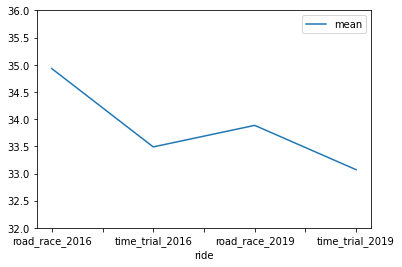

In [644]:
# plot the average speed of the four rides
df_mean.plot(kind='line', x='ride', y='mean')
plt.ylim(32,36)

**Interpretation from the plotting of the mean**

From the summary and the graph above, the highest speed can be seen in the road race 2016 (around 35 km/h). Also, the second high average speed is the road race 2019, which is around 33.9 km/h. Finally, the average speed of the two time trials (one in 2016 and one in 2019) is around 33.5 km/h and 33 km/h respectively. Therefore, the time trials are not faster than the road races in average. 

***Range of speed for each dataset***

We subtract the minimum speed from the maximum speed of each dataset to compare which ride has changed the speed significantly (i.e. how large the difference between the slowest speed and the fastest speed) when riding.

In [648]:
def speed_range(dataframe):
    result = dataframe['speed'].max() - dataframe['speed'].min()
    return result

In [651]:
# 2016 road race
print("the range of speed of the 2016 road race:", speed_range(cleaned_rr_2016))

# 2016 time trial
print("the range of speed of the 2016 time trial:", speed_range(cleaned_tt_2016))

# 2016 road race
print("the range of speed of the 2019 road race:", speed_range(cleaned_rr_2019))

# 2016 time trial
print("the range of speed of the 2019 time trial:", speed_range(cleaned_tt_2019))

the range of speed of the 2016 road race: 62.086077718012255
the range of speed of the 2016 time trial: 67.61235568311842
the range of speed of the 2019 road race: 63.63252825017256
the range of speed of the 2019 time trial: 56.429151825098586


**Comment:** By comparing the range of speeds for each ride, we can see that the 2016 time trial has the largest change in the speed, which the slowest record differs from the fastest record by 67.6 km/h.

***Plotting the speed with the same y-limit***

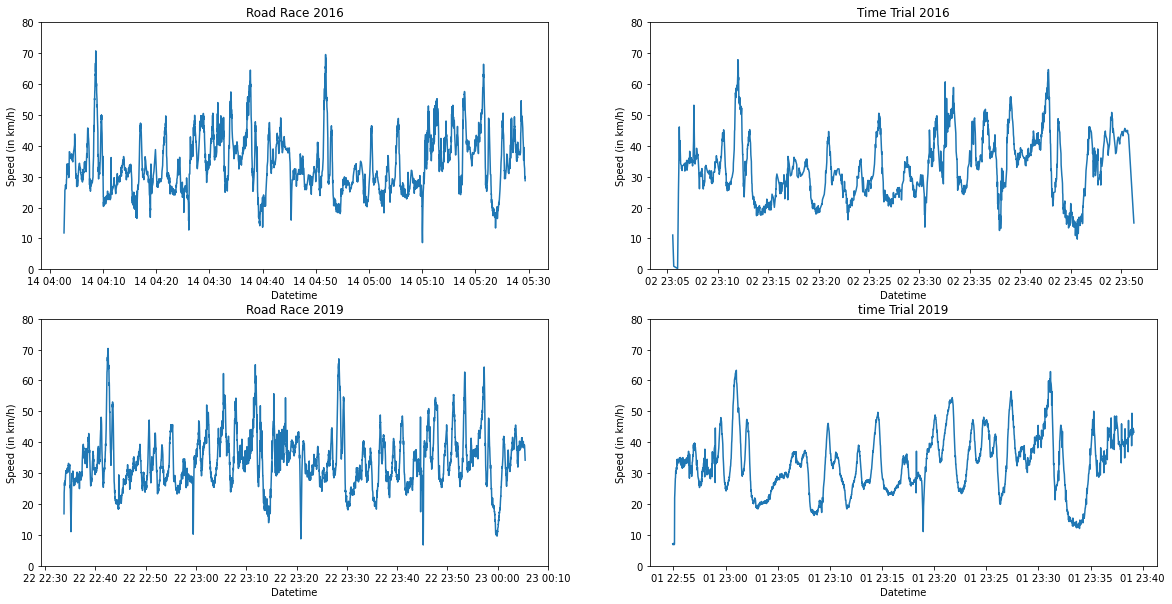

In [653]:
plt.figure(figsize=(20,10))

# cleaned_rr_2016
plt.subplot(2,2,1)
plt.ylim(0,80)
plt.title("Road Race 2016")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_rr_2016['speed'])

# cleaned_tt_2016
plt.subplot(2,2,2)
plt.ylim(0,80)
plt.title("Time Trial 2016")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_tt_2016['speed'])

# cleaned_rr_2019
plt.subplot(2,2,3)
plt.ylim(0,80)
plt.title("Road Race 2019")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_rr_2019['speed'])

# cleaned_tt_2019
plt.subplot(2,2,4)
plt.ylim(0,80)
plt.title("time Trial 2019")
plt.xlabel("Datetime")
plt.ylabel("Speed (in km/h)")
plt.plot(cleaned_tt_2019['speed'])

**Interpretation:** By obsevration, there are maximum records which are over 70 km/h in the two road races, while only the maximum speed record in the 2016 time trial nearly reaches 70% (but still under).

In [680]:
# check the maximum speed

# rr_2016
print("max speed of 2016 road race:", cleaned_rr_2016['speed'].max())

# tt_2016
print("max speed of 2016 time trial:", cleaned_tt_2016['speed'].max())

# rr_2019
print("max speed of 2019 road race:", cleaned_rr_2019['speed'].max())

# tt_2019
print("max speed of 2019 time trial:", cleaned_tt_2019['speed'].max())

max speed of 2016 road race: 70.70948664334745
max speed of 2016 time trial: 67.86201094032148
max speed of 2019 road race: 70.37046868335639
max speed of 2019 time trial: 63.300734121945005


***Compare difference speed between four rides***

We follow the instruction of the [figure 3.5 from the textbook](https://link-springer-com.simsrad.net.ocs.mq.edu.au/chapter/10.1007/978-3-319-50017-1_3) to generate the relative frequency of the speed of road races and time trials. Then, we plot the difference of speeds between road races and time trials.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



